In [1]:
import pandas as pd

In [2]:
ls

'Aula Séries Temporais .ipynb'   etanol_dataset.xlsx   IPCA.xlsx


In [3]:
df = pd.read_excel('etanol_dataset.xlsx')
df.head()

,Data,Preço
0,29/11/2002,"0,6842"
1,06/12/2002,"0,6897"
2,13/12/2002,"0,6926"
3,20/12/2002,"0,7065"
4,27/12/2002,"0,6941"


In [4]:
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df.sort_values('Data')
df.set_index('Data', inplace=True)
df.colums = df['Preço']
df['Preço'] = df['Preço'].apply(lambda x: float(x.replace(",", ".")) * 1000)
df.head()
df.head(10)

/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,Preço
Data,
2002-11-29,684.2
2002-12-06,689.7
2002-12-13,692.6
2002-12-20,706.5
2002-12-27,694.1
2003-01-03,728.1
2003-01-10,792.7
2003-01-17,819.5
2003-01-24,861.0


### Divisão Treino e Teste

In [5]:
df.tail(), df.shape

(             Preço
 Data              
 2020-07-17  1620.6
 2020-07-24  1662.0
 2020-07-31  1692.0
 2020-08-07  1673.5
 2020-08-14  1661.3,
 (925, 1))

In [6]:
# (52 semanas x 3 anos)
semanas = 156

train = df.iloc[:-semanas, 0:1].copy()
test = df.iloc[-semanas:, 0:1].copy()

### Plot dos conjuntos

In [7]:
import matplotlib.pyplot as plt

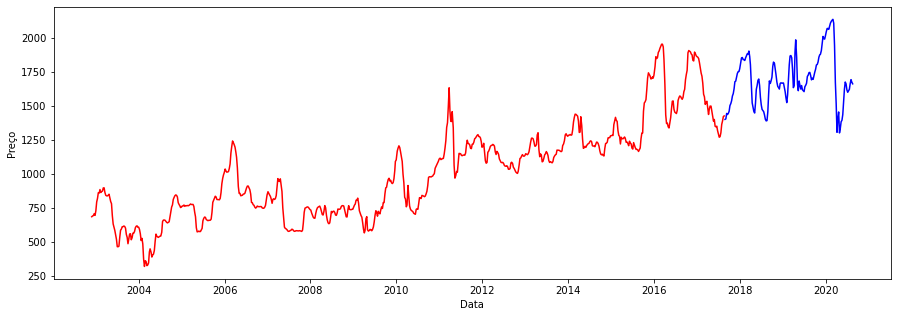

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(train['Preço'], color='r')
plt.plot(test['Preço'], color='b')
plt.ylabel('Preço')
plt.xlabel('Data')
plt.show()

### Tendêncida, Sazionalidade e Resíduo

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


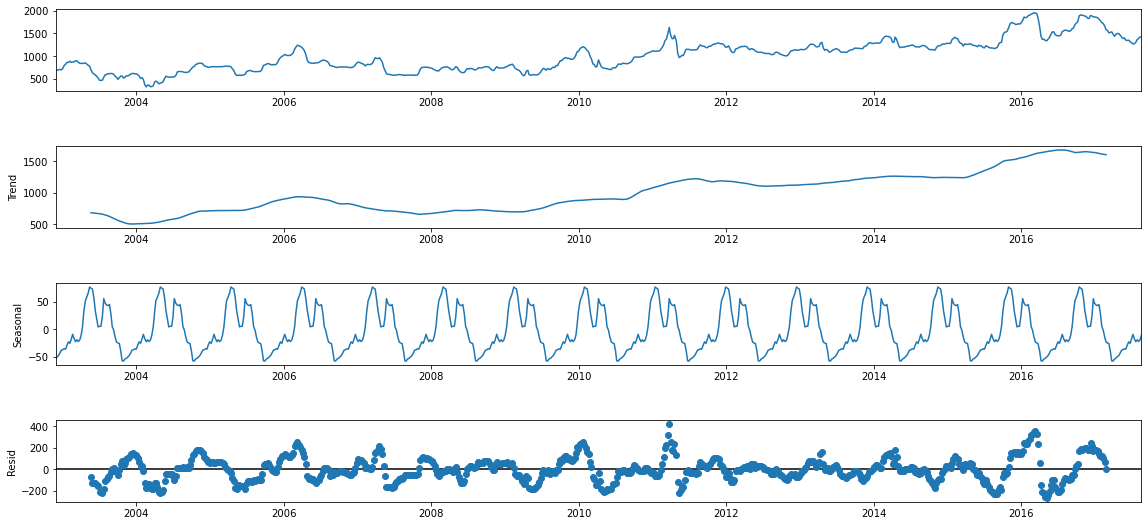

In [10]:
temp = seasonal_decompose(train, freq=50)
fig = temp.plot();
fig.set_size_inches(18, 8);

### Testes Estatísticos (DF e o KPSS)

In [11]:
from statsmodels.tsa.stattools import kpss, adfuller

In [12]:
train.shape

(769, 1)

#### Dickey Fuller

In [13]:
df_test = adfuller(train['Preço'])
df_test_opt = pd.Series(df_test[0:4], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados', 'Número de observações'])
df_test_opt = round(df_test_opt, 4)

for key, value in df_test[4].items():
    df_test_opt['VC (%s)'%key] = value.round(4)
    
df_test_opt

Teste Estatístico DF      -1.8551
P-Value                    0.3535
Lags Usados                6.0000
Número de observações    762.0000
VC (1%)                   -3.4390
VC (5%)                   -2.8653
VC (10%)                  -2.5688
dtype: float64

### KPSS

In [14]:
kpss_test = kpss(train['Preço'])
kpss_test_opt = pd.Series(kpss_test[0:3], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados'])
kpss_test_opt = round(kpss_test_opt, 4)

for key, value in kpss_test[3].items():
    kpss_test_opt['VC (%s)'%key] = value

kpss_test_opt

/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Teste Estatístico DF     2.9496
P-Value                  0.0100
Lags Usados             20.0000
VC (10%)                 0.3470
VC (5%)                  0.4630
VC (2.5%)                0.5740
VC (1%)                  0.7390
dtype: float64

### Tornando uma série estacionária

Por periódo

#### Diferenciação

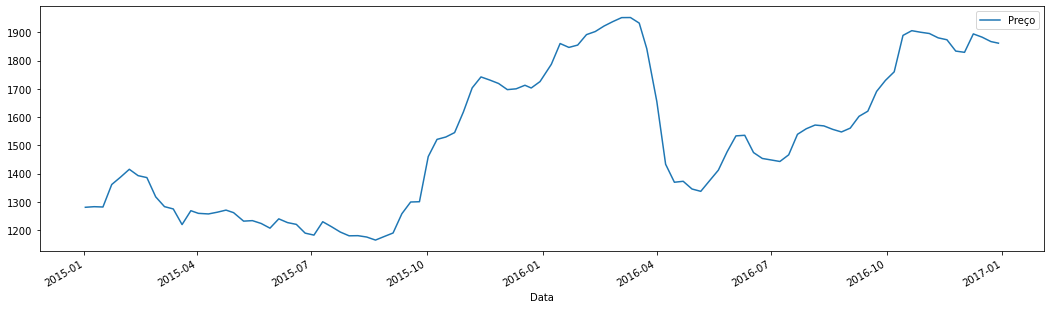

In [15]:
train.loc["2015":"2016"].plot(figsize=(18, 5));

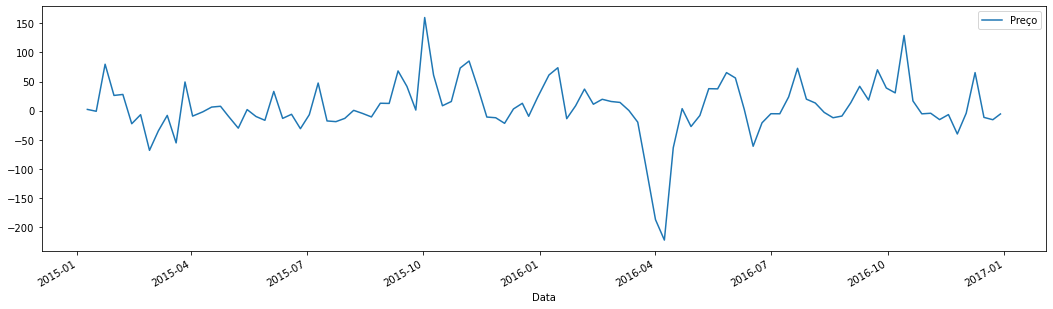

In [16]:
train.loc["2015":"2016"].diff().plot(figsize=(18, 5));

In [17]:
obs_df = train.loc["2015":"2016"].diff().dropna()

df_test = adfuller(obs_df)
df_test_opt = pd.Series(df_test[0:4], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados', 'Número de observações'])
df_test_opt = round(df_test_opt, 4)

for key, value in df_test[4].items():
    df_test_opt['VC (%s)'%key] = value.round(4)
    
df_test_opt

Teste Estatístico DF      -5.5269
P-Value                    0.0000
Lags Usados                0.0000
Número de observações    103.0000
VC (1%)                   -3.4955
VC (5%)                   -2.8900
VC (10%)                  -2.5820
dtype: float64

In [18]:
kpss_test = kpss(obs_df)
kpss_test_opt = pd.Series(kpss_test[0:3], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados'])
kpss_test_opt = round(kpss_test_opt, 4)

for key, value in kpss_test[3].items():
    kpss_test_opt['VC (%s)'%key] = value

kpss_test_opt

/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Teste Estatístico DF     0.0664
P-Value                  0.1000
Lags Usados             13.0000
VC (10%)                 0.3470
VC (5%)                  0.4630
VC (2.5%)                0.5740
VC (1%)                  0.7390
dtype: float64

In [19]:
# Segunda diferenciação (Sempre deve ocorrer em cima da primeira)
obs_df_second = train.loc["2005": "2006"].diff().diff().dropna()

In [20]:
df_test = adfuller(obs_df_second)
df_test_opt = pd.Series(df_test[0:4], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados', 'Número de observações'])
df_test_opt = round(df_test_opt, 4)

for key, value in df_test[4].items():
    df_test_opt['VC (%s)'%key] = value.round(4)
    
df_test_opt

Teste Estatístico DF     -6.3503
P-Value                   0.0000
Lags Usados               9.0000
Número de observações    92.0000
VC (1%)                  -3.5035
VC (5%)                  -2.8935
VC (10%)                 -2.5838
dtype: float64

In [21]:
kpss_test = kpss(obs_df_second)
kpss_test_opt = pd.Series(kpss_test[0:3], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados'])
kpss_test_opt = round(kpss_test_opt, 4)

for key, value in kpss_test[3].items():
    kpss_test_opt['VC (%s)'%key] = value

kpss_test_opt

/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Teste Estatístico DF     0.1107
P-Value                  0.1000
Lags Usados             13.0000
VC (10%)                 0.3470
VC (5%)                  0.4630
VC (2.5%)                0.5740
VC (1%)                  0.7390
dtype: float64

Visão geral

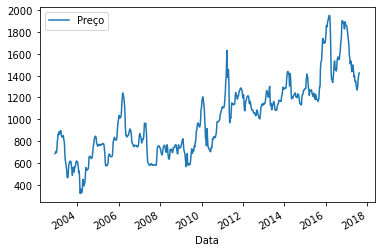

In [22]:
train.plot()

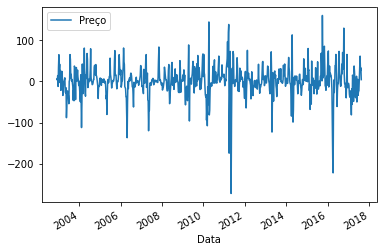

In [23]:
train.diff().plot()

In [24]:
obs_total = train.diff().dropna()

df_test = adfuller(obs_df)
df_test_opt = pd.Series(df_test[0:4], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados', 'Número de observações'])
df_test_opt = round(df_test_opt, 4)

for key, value in df_test[4].items():
    df_test_opt['VC (%s)'%key] = value.round(4)
    
df_test_opt

Teste Estatístico DF      -5.5269
P-Value                    0.0000
Lags Usados                0.0000
Número de observações    103.0000
VC (1%)                   -3.4955
VC (5%)                   -2.8900
VC (10%)                  -2.5820
dtype: float64

In [25]:
kpss_test = kpss(obs_total)
kpss_test_opt = pd.Series(kpss_test[0:3], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados'])
kpss_test_opt = round(kpss_test_opt, 4)

for key, value in kpss_test[3].items():
    kpss_test_opt['VC (%s)'%key] = value

kpss_test_opt

/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Teste Estatístico DF     0.0221
P-Value                  0.1000
Lags Usados             20.0000
VC (10%)                 0.3470
VC (5%)                  0.4630
VC (2.5%)                0.5740
VC (1%)                  0.7390
dtype: float64

### Aplicando os dados de inflação

In [26]:
ipca = pd.read_excel('IPCA.xlsx', sheet_name='IPCA')
ipca['Data'] = pd.to_datetime(ipca['Data'])
ipca.set_index('Data', inplace=True)
ipca

,ANO,Mês,IPCA,Acumulado,Index,Final IPCA
Data,,,,,,
2002-11-01,2002,11,0.0302,1.030200,162,2.392219
2002-12-01,2002,12,0.0210,1.051834,161,2.377715
2003-01-01,2003,1,0.0225,1.075500,160,2.367535
2003-02-01,2003,2,0.0157,1.092386,159,2.346417
2003-03-01,2003,3,0.0123,1.105822,158,2.316991
...,...,...,...,...,...,...
2015-12-01,2015,12,0.0096,2.316991,5,1.105822
2016-01-01,2016,1,0.0127,2.346417,4,1.092386
2016-02-01,2016,2,0.0090,2.367535,3,1.075500


In [27]:
train['ANO'] = train.index.year
train['Mês'] = train.index.month

train.head()

,Preço,ANO,Mês
Data,,,
2002-11-29,684.2,2002,11
2002-12-06,689.7,2002,12
2002-12-13,692.6,2002,12
2002-12-20,706.5,2002,12
2002-12-27,694.1,2002,12


In [28]:
train.tail()

,Preço,ANO,Mês
Data,,,
2017-07-21,1302.0,2017,7
2017-07-28,1363.2,2017,7
2017-08-04,1388.5,2017,8
2017-08-11,1421.2,2017,8
2017-08-18,1425.3,2017,8


#### Combinar o dataframe de treino com o de IPCA

In [29]:
index=train.index
train = train.merge(ipca.loc[:, ['ANO', 'Mês', 'Final IPCA']], how='left', on=['ANO', 'Mês'])
train.head()

,Preço,ANO,Mês,Final IPCA
0,684.2,2002,11,2.392219
1,689.7,2002,12,2.377715
2,692.6,2002,12,2.377715
3,706.5,2002,12,2.377715
4,694.1,2002,12,2.377715


In [30]:
train['Preço IPCA'] = train['Preço'] * train['Final IPCA']
train.set_index(index, inplace=True)
train.dropna(inplace=True)
train.head()

,Preço,ANO,Mês,Final IPCA,Preço IPCA
Data,,,,,
2002-11-29,684.2,2002,11,2.392219,1636.756251
2002-12-06,689.7,2002,12,2.377715,1639.910005
2002-12-13,692.6,2002,12,2.377715,1646.805378
2002-12-20,706.5,2002,12,2.377715,1679.855616
2002-12-27,694.1,2002,12,2.377715,1650.371950


In [35]:
df_test = adfuller(train['Preço'])
df_test_opt = pd.Series(df_test[0:4], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados', 'Número de observações'])
df_test_opt = round(df_test_opt, 4)

for key, value in df_test[4].items():
    df_test_opt['VC (%s)'%key] = value.round(4)
    
df_test_opt

Teste Estatístico DF      -1.8701
P-Value                    0.3463
Lags Usados                6.0000
Número de observações    694.0000
VC (1%)                   -3.4398
VC (5%)                   -2.8657
VC (10%)                  -2.5690
dtype: float64

In [36]:
df_test = adfuller(train['Preço IPCA'])
df_test_opt = pd.Series(df_test[0:4], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados', 'Número de observações'])
df_test_opt = round(df_test_opt, 4)

for key, value in df_test[4].items():
    df_test_opt['VC (%s)'%key] = value.round(4)
    
df_test_opt

Teste Estatístico DF      -4.0851
P-Value                    0.0010
Lags Usados                6.0000
Número de observações    694.0000
VC (1%)                   -3.4398
VC (5%)                   -2.8657
VC (10%)                  -2.5690
dtype: float64

In [37]:
kpss_test = kpss(train['Preço IPCA'])
kpss_test_opt = pd.Series(kpss_test[0:3], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados'])
kpss_test_opt = round(kpss_test_opt, 4)

for key, value in kpss_test[3].items():
    kpss_test_opt['VC (%s)'%key] = value

kpss_test_opt

/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


Teste Estatístico DF     0.3954
P-Value                  0.0792
Lags Usados             20.0000
VC (10%)                 0.3470
VC (5%)                  0.4630
VC (2.5%)                0.5740
VC (1%)                  0.7390
dtype: float64

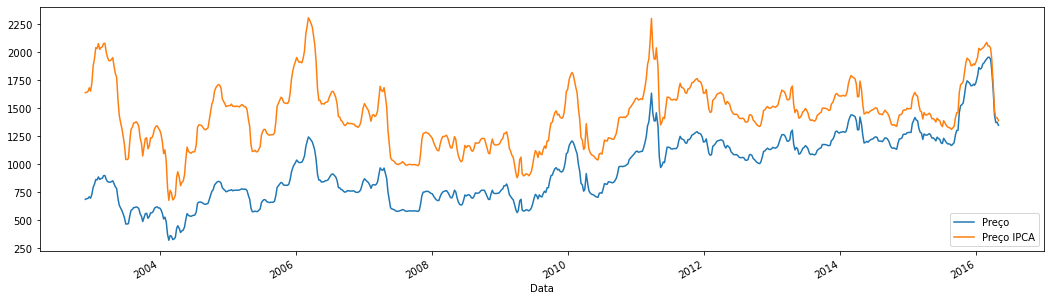

In [33]:
train.loc[:, ['Preço', 'Preço IPCA']].plot(figsize=(18,5));

### Log

In [43]:
train.head()

,Preço,ANO,Mês,Final IPCA,Preço IPCA
Data,,,,,
2002-11-29,684.2,2002,11,2.392219,1636.756251
2002-12-06,689.7,2002,12,2.377715,1639.910005
2002-12-13,692.6,2002,12,2.377715,1646.805378
2002-12-20,706.5,2002,12,2.377715,1679.855616
2002-12-27,694.1,2002,12,2.377715,1650.371950


In [45]:
import numpy as np

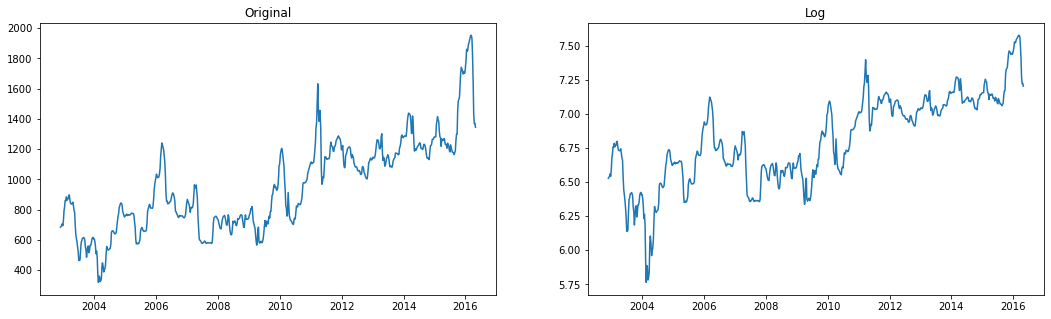

In [52]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.title('Original')
plt.plot(train['Preço'])

preco_log = np.log(train['Preço'])
plt.subplot(122)
plt.title('Log')
plt.plot(preco_log)
plt.show()

In [53]:
df_test = adfuller(preco_log)
df_test_opt = pd.Series(df_test[0:4], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados', 'Número de observações'])
df_test_opt = round(df_test_opt, 4)

for key, value in df_test[4].items():
    df_test_opt['VC (%s)'%key] = value.round(4)
    
df_test_opt

Teste Estatístico DF      -2.1052
P-Value                    0.2424
Lags Usados                6.0000
Número de observações    694.0000
VC (1%)                   -3.4398
VC (5%)                   -2.8657
VC (10%)                  -2.5690
dtype: float64

In [54]:
kpss_test = kpss(preco_log)
kpss_test_opt = pd.Series(kpss_test[0:3], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados'])
kpss_test_opt = round(kpss_test_opt, 4)

for key, value in kpss_test[3].items():
    kpss_test_opt['VC (%s)'%key] = value

kpss_test_opt

/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Teste Estatístico DF     2.5188
P-Value                  0.0100
Lags Usados             20.0000
VC (10%)                 0.3470
VC (5%)                  0.4630
VC (2.5%)                0.5740
VC (1%)                  0.7390
dtype: float64

### Box-Cox

In [55]:
from scipy.stats import boxcox

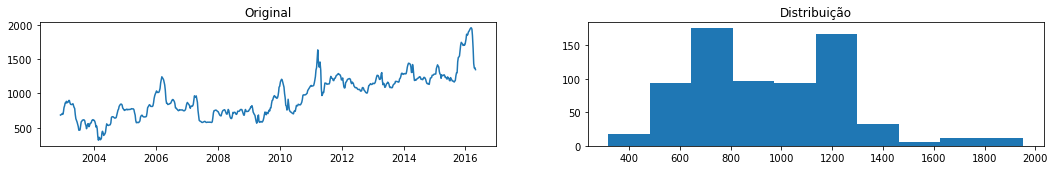

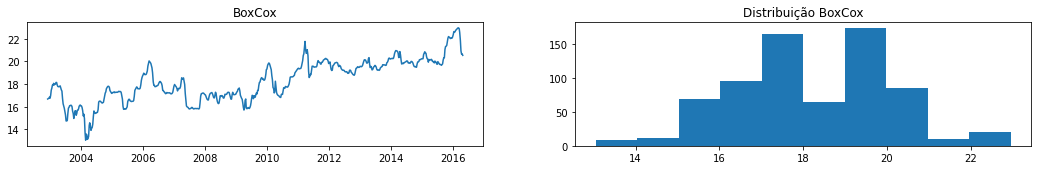

In [57]:
plt.figure(figsize=(18,5))
plt.subplot(221)
plt.title('Original')
plt.plot(train['Preço'])

plt.subplot(222)
plt.title('Distribuição')
plt.hist(train['Preço'])
plt.show()

train['boxcox_valor'], lb = boxcox(train['Preço'])

plt.figure(figsize=(18,5))
plt.subplot(223)
plt.title('BoxCox')
plt.plot(train['boxcox_valor'])

plt.subplot(224)
plt.title('Distribuição BoxCox')
plt.hist(train['boxcox_valor'])
plt.show()

In [58]:
train.head()

,Preço,ANO,Mês,Final IPCA,Preço IPCA,boxcox_valor
Data,,,,,,
2002-11-29,684.2,2002,11,2.392219,1636.756251,16.674856
2002-12-06,689.7,2002,12,2.377715,1639.910005,16.716706
2002-12-13,692.6,2002,12,2.377715,1646.805378,16.738673
2002-12-20,706.5,2002,12,2.377715,1679.855616,16.843016
2002-12-27,694.1,2002,12,2.377715,1650.371950,16.750008


In [59]:
df_test = adfuller(train['boxcox_valor'])
df_test_opt = pd.Series(df_test[0:4], index=['Teste Estatístico DF', 'P-Value', 
                                        'Lags Usados', 'Número de observações'])
df_test_opt = round(df_test_opt, 4)

for key, value in df_test[4].items():
    df_test_opt['VC (%s)'%key] = value.round(4)
    
df_test_opt

Teste Estatístico DF      -2.0139
P-Value                    0.2805
Lags Usados                6.0000
Número de observações    694.0000
VC (1%)                   -3.4398
VC (5%)                   -2.8657
VC (10%)                  -2.5690
dtype: float64

In [61]:
lb

0.25318248550984057

In [65]:
import ipywidgets as wdg
from ipywidgets import interactive

def f(lb):
    plt.figure(figsize=(18, 5))
    if lb == 0:
        train['boxcox_valor'] = np.log(train['Preço'])
    else:
        train['boxcox_valor'] = (train['Preço'] ** lb - 1) / lb
    plt.plot(train['boxcox_valor'])
    plt.show()

intr_plot = interactive(f, lb=(-5, 5, 0.25))
intr_plot

interactive(children=(FloatSlider(value=0.0, description='lb', max=5.0, min=-5.0, step=0.25), Output()), _dom_…

### Avaliação de Modelo

In [74]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def check_erro(orig, prev, nome_col='', nome_indice=''):
    
    vies = np.mean(orig - prev)
    mse = mean_squared_error(orig, prev)
    rmse = sqrt(mean_squared_error(orig, prev))
    mae = mean_absolute_error(orig, prev)
    mape = np.mean(np.abs((orig - prev) / orig)) * 100
    
    grupo_erro = [vies, mse, rmse, mae, mape]
    serie = pd.DataFrame(grupo_erro, index=['VIÉS','MSE','RMSE','MAE', 'MAPE'], columns=[nome_col])
    serie.index.name = nome_indice
    
    return serie

### Modelos de Previsão

#### Shift

teste = [8, 9, 10]
treinamento [historico] = [1, 2, 3, 4, 5]

i = 0
    y = 5
    prev  [5]
    hist  [1, 2, 3, 4, 5, 8]
    
i = 1
    y = 8
    prev [5, 8]
    historico [1, 2, 3, 4, 5, 8, 9]

In [87]:
train[['Preço IPCA']].shift()

,Preço IPCA
Data,
2002-11-29,NaN
2002-12-06,1636.756251
2002-12-13,1639.910005
2002-12-20,1646.805378
2002-12-27,1679.855616
...,...
2016-04-01,1937.899330
2016-04-08,1705.187040
2016-04-15,1476.173580


In [76]:
df_modelo_1 = train[['Preço IPCA']]
df_modelo_1.columns = ['Real']
df_modelo_1['Previsão'] = df_modelo_1['Real'].shift()
df_modelo_1.dropna(inplace=True)
df_modelo_1.head()

/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Real,Previsão
Data,,
2002-12-06,1639.910005,1636.756251
2002-12-13,1646.805378,1639.910005
2002-12-20,1679.855616,1646.805378
2002-12-27,1650.371950,1679.855616
2003-01-03,1723.801911,1650.371950


In [77]:
check_erro(
    df_modelo_1['Real'],
    df_modelo_1['Previsão'],
    nome_col = 'Simples',
    nome_indice = 'Base Treino'
)

,Simples
Base Treino,
VIÉS,-0.358473
MSE,3187.758272
RMSE,56.460236
MAE,35.706657
MAPE,2.583517


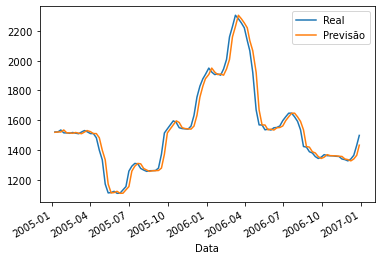

In [88]:
df_modelo_1['2005':'2006'].plot()

### Predição no conjunto de teste

In [103]:
test_modelo_1 = test[['Preço']]
test_modelo_1.columns = ['Real']

hist = [df_modelo_1.iloc[i, 0] for i in range(len(df_modelo_1))]
prev = []

for sample in range(len(test_modelo_1)):
    y = hist[-1]
    obs = test_modelo_1.iloc[sample, 0]
    prev.append(y)
    hist.append(obs)
    
test_modelo_1['Previsão'] = prev

In [104]:
check_erro(
    test_modelo_1['Real'],
    test_modelo_1['Previsão'],
    nome_col = 'Simples',
    nome_indice = 'Base Treino'
)

,Simples
Base Treino,
VIÉS,1.765865
MSE,3872.450157
RMSE,62.229014
MAE,40.924839
MAPE,2.487503


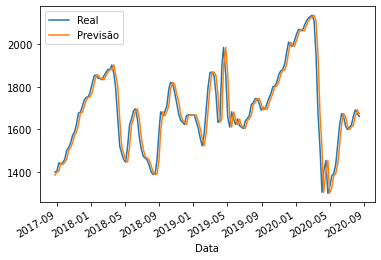

In [105]:
test_modelo_1.plot()

In [109]:
test['Preço'].shift(5)

Data
2017-08-25       NaN
2017-09-01       NaN
2017-09-08       NaN
2017-09-15       NaN
2017-09-22       NaN
               ...  
2020-07-17    1674.6
2020-07-24    1660.7
2020-07-31    1616.6
2020-08-07    1599.2
2020-08-14    1610.1
Name: Preço, Length: 156, dtype: float64

# Média móvel simples

In [136]:
df_modelo_2 = train[['Preço IPCA']]
df_modelo_2.columns = ['Real']
df_modelo_2['Previsão'] = df_modelo_2.rolling(2).mean()
df_modelo_2.dropna(inplace=True)
df_modelo_2.head()

/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Real,Previsão
Data,,
2002-12-06,1639.910005,1638.333128
2002-12-13,1646.805378,1643.357691
2002-12-20,1679.855616,1663.330497
2002-12-27,1650.371950,1665.113783
2003-01-03,1723.801911,1687.086931


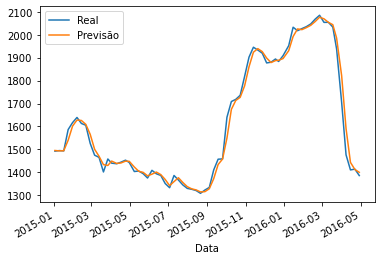

In [137]:
df_modelo_2['2015': '2016'].plot()

In [138]:
check_erro(
    df_modelo_2['Real'],
    df_modelo_2['Previsão'],
    nome_col = 'Simples',
    nome_indice = 'Base Treino'
)

,Simples
Base Treino,
VIÉS,-0.179237
MSE,796.939568
RMSE,28.230118
MAE,17.853329
MAPE,1.291758


VIÉS	-0.358473
MSE	3187.758272
RMSE	56.460236
MAE	35.706657
MAPE	2.583517

#### Predição no conjunto de teste

In [142]:
test_modelo_2 = test[['Preço']]
test_modelo_2.columns = ['Real']

hist = [df_modelo_2.iloc[i, 0] for i in range(len(df_modelo_2))]
prev = []

for sample in range(len(test_modelo_2)):
    y = np.mean(hist[-2:])
    obs = test_modelo_2.iloc[sample, 0]
    prev.append(y)
    hist.append(obs)
    
test_modelo_2['Previsão'] = prev

In [143]:
check_erro(
    test_modelo_2['Real'],
    test_modelo_2['Previsão'],
    nome_col = 'Simples',
    nome_indice = 'Base Treino'
)

,Simples
Base Treino,
VIÉS,2.597758
MSE,6829.657075
RMSE,82.641739
MAE,54.979809
MAPE,3.336927


	Simples
Base Treino	
VIÉS	1.765865
MSE	3872.450157
RMSE	62.229014
MAE	40.924839
MAPE	2.487503

### MME

In [147]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [157]:
train_modelo_3 = train[['Preço IPCA']]
alpha_ = [0, 0.5, 1]

for key, value in enumerate(alpha_):
    model = ExponentialSmoothing(train_modelo_3['Preço IPCA']).fit(smoothing_level=value)
    train_modelo_3['a={}'.format(value)] = model.predict(start=0, end=len(train_modelo_3)-1)

/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/arthurfortes/anacon

In [158]:
train_modelo_3

,Preço IPCA,a=0,a=0.5,a=1
Data,,,,
2002-11-29,1636.756251,1433.514502,1647.945062,1636.756251
2002-12-06,1639.910005,1433.514502,1642.350657,1636.756251
2002-12-13,1646.805378,1433.514502,1641.130331,1639.910005
2002-12-20,1679.855616,1433.514502,1643.967854,1646.805378
2002-12-27,1650.371950,1433.514502,1661.911735,1679.855616
...,...,...,...,...
2016-04-01,1705.187040,1433.514502,1991.618381,1937.899330
2016-04-08,1476.173580,1433.514502,1848.402711,1705.187040
2016-04-15,1410.446820,1433.514502,1662.288145,1476.173580


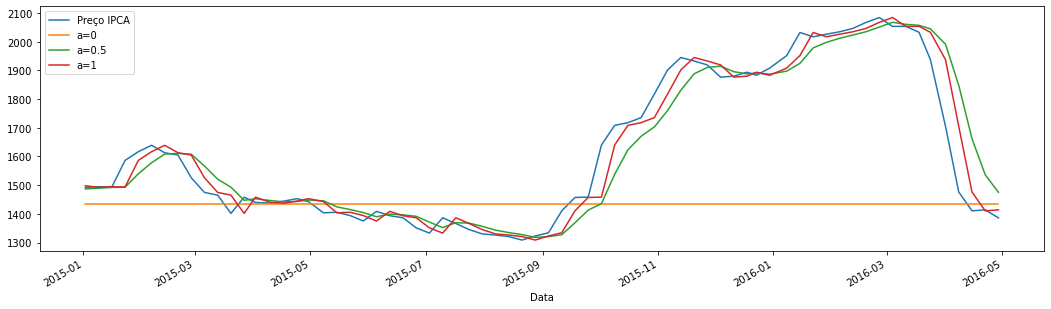

In [159]:
train_modelo_3['2015':'2016'].plot(figsize=(18,5))

In [161]:
check_erro(
    train_modelo_3['Preço IPCA'],
    train_modelo_3['a=0'],
    nome_col = 'Simples',
    nome_indice = 'Base Treino'
)

,Simples
Base Treino,
VIÉS,0.000490
MSE,80945.899624
RMSE,284.509929
MAE,219.834591
MAPE,16.476764


In [162]:
check_erro(
    train_modelo_3['Preço IPCA'],
    train_modelo_3['a=0.5'],
    nome_col = 'Simples',
    nome_indice = 'Base Treino'
)

,Simples
Base Treino,
VIÉS,-0.620409
MSE,6614.660988
RMSE,81.330566
MAE,54.392889
MAPE,3.935319


In [163]:
check_erro(
    train_modelo_3['Preço IPCA'],
    train_modelo_3['a=1'],
    nome_col = 'Simples',
    nome_indice = 'Base Treino'
)

,Simples
Base Treino,
VIÉS,-0.357962
MSE,3183.210828
RMSE,56.419951
MAE,35.655721
MAPE,2.579831


In [167]:
train_modelo_3

,Preço IPCA,a=0,a=0.5,a=1
Data,,,,
2002-11-29,1636.756251,1433.514502,1647.945062,1636.756251
2002-12-06,1639.910005,1433.514502,1642.350657,1636.756251
2002-12-13,1646.805378,1433.514502,1641.130331,1639.910005
2002-12-20,1679.855616,1433.514502,1643.967854,1646.805378
2002-12-27,1650.371950,1433.514502,1661.911735,1679.855616
...,...,...,...,...
2016-04-01,1705.187040,1433.514502,1991.618381,1937.899330
2016-04-08,1476.173580,1433.514502,1848.402711,1705.187040
2016-04-15,1410.446820,1433.514502,1662.288145,1476.173580


In [179]:
test_modelo_3 = test[['Preço']]
test_modelo_3.columns = ['Real']

hist = [train_modelo_3.iloc[i, 0] for i in range(len(train_modelo_3))]
hist_prev = [train_modelo_3.iloc[i, 2] for i in range(len(train_modelo_3))]

prev = []

for sample in range(len(test_modelo_3)):
    y = hist_prev[-1] + .5 * (hist[-1] - hist_prev[-1])
    obs = test_modelo_3.iloc[sample, 0]
    hist.append(obs)
    prev.append(y)
    hist_prev.append(y)
    
test_modelo_3['Previsão'] = prev

In [182]:
# 1 2=x[1] 3=x[2->1] 4=x[3->2->1] 

In [ ]:
2 1 > 2 

In [181]:
test_modelo_3

,Real,Previsão
Data,,
2017-08-25,1399.9,1430.491766
2017-09-01,1403.2,1415.195883
2017-09-08,1443.5,1409.197941
2017-09-15,1435.5,1426.348971
2017-09-22,1444.0,1430.924485
...,...,...
2020-07-17,1620.6,1611.344414
2020-07-24,1662.0,1615.972207
2020-07-31,1692.0,1638.986104


In [177]:
check_erro(
    test_modelo_3['Real'],
    test_modelo_3['Previsão'],
    nome_col = 'Simples',
    nome_indice = 'Base Treino'
)

,Simples
Base Treino,
VIÉS,1.765865
MSE,3872.450157
RMSE,62.229014
MAE,40.924839
MAPE,2.487503


#### Modelo Auto Regressivo

In [183]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

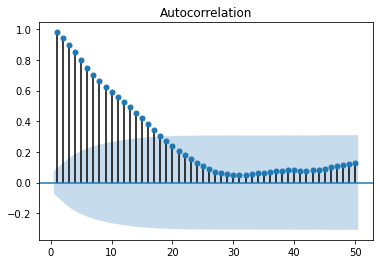

In [184]:
plot_acf(train['Preço IPCA'], lags=50, zero=False);

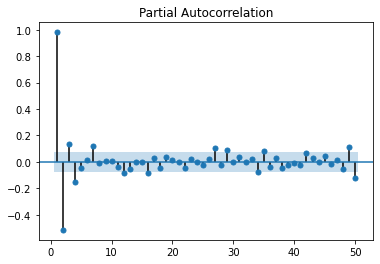

In [185]:
plot_pacf(train['Preço IPCA'], lags=50, zero=False);

In [186]:
ar_train = train[['Preço IPCA']]
ar_train.columns = ['Real']

In [187]:
from statsmodels.tsa.arima_model import ARMA

In [190]:
ar_model = ARMA(ar_train['Real'], order=[2,0]).fit()
ar_train['Previsão'] = ar_model.predict(start=0, end=len(ar_train)-1)
ar_train

/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/arthurfortes/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Real,Previsão
Data,,
2002-11-29,1636.756251,1436.342736
2002-12-06,1639.910005,1632.744839
2002-12-13,1646.805378,1635.388098
2002-12-20,1679.855616,1643.896295
2002-12-27,1650.371950,1688.671150
...,...,...
2016-04-01,1705.187040,1876.682416
2016-04-08,1476.173580,1584.126400
2016-04-15,1410.446820,1363.721010


In [191]:
check_erro(
    ar_train['Real'],
    ar_train['Previsão'],
    nome_col = 'Simples',
    nome_indice = 'Base Treino'
)

,Simples
Base Treino,
VIÉS,-0.002375
MSE,2460.979050
RMSE,49.608256
MAE,32.018493
MAPE,2.328474


In [194]:
c1, c2 = ar_model.arparams

In [197]:
ar_test = test[['Preço']]
ar_test.columns = ['Real']

hist = [ar_train.iloc[i, 0] for i in range(len(ar_train))]

prev = []

for sample in range(len(ar_test)):
    # y = yt-1 * c1 _ yt-2 * c2
    y = (hist[-1] * c1) + (hist[-2] * c2)
    obs = ar_test.iloc[sample, 0]
    hist.append(obs)
    prev.append(y)
    
ar_test['Previsão'] = prev

In [198]:
ar_test

,Real,Previsão
Data,,
2017-08-25,1399.9,1330.945488
2017-09-01,1403.2,1365.104772
2017-09-08,1443.5,1363.071529
2017-09-15,1435.5,1420.149729
2017-09-22,1444.0,1388.920719
...,...,...
2020-07-17,1620.6,1567.510749
2020-07-24,1662.0,1577.504132
2020-07-31,1692.0,1632.685884


In [199]:
check_erro(
    ar_test['Real'],
    ar_test['Previsão'],
    nome_col = 'Simples',
    nome_indice = 'Base Treino'
)

,Simples
Base Treino,
VIÉS,51.267331
MSE,5332.704760
RMSE,73.025371
MAE,61.838733
MAPE,3.699557
